In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
atheletes_csv = pd.read_csv('athlete_events.csv')
continents_csv = pd.read_csv('noc_regions.csv')

In [3]:
# Clean the data
athletes_columns_to_be_cleaned = ['Age']
atheletes_csv = atheletes_csv.dropna(axis=0, subset=athletes_columns_to_be_cleaned)

continents_columns_to_be_cleaned = ['Continent']
continents_csv = continents_csv.dropna(axis=0, subset=continents_columns_to_be_cleaned)

# We cleaned the data so every country is part of the 5 continents that participate in the olympic games
# Europe, Asia, Africa, America, Oceania
continents_order = ['Europe', 'Asia', 'Africa', 'America', 'Oceania']

# Merge the data
merged_data = pd.merge(atheletes_csv, continents_csv, on='NOC')

In [4]:
# Load utility variables
min_age = merged_data['Age'].min()
max_age = merged_data['Age'].max()
age_groups = [(0, 18),(18, 24),(25, 34),(35, 44),(45, 54),(55, 64),(65, 100)]

# Create the age groups
merged_data['Age Group'] = merged_data['Age'].apply(lambda x: 'Under 18' if x < 18 else '18-24' if x < 24 else '25-34' if x < 34 else '35-44' if x < 44 else '45-54' if x < 54 else '55-64' if x < 64 else '65 and over')
age_group_counts = merged_data['Age Group'].value_counts()

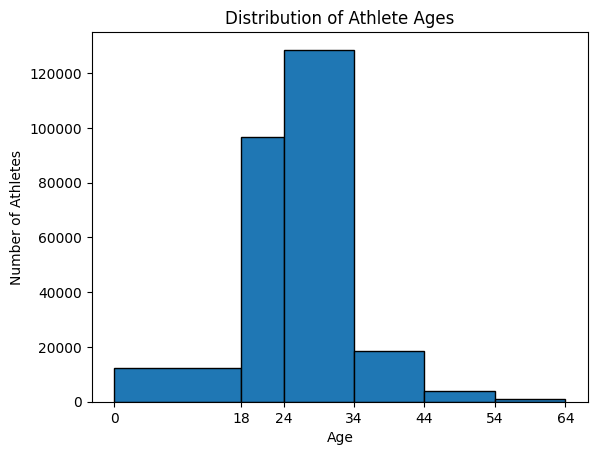

In [5]:
# Create the histogram
fig, ax = plt.subplots()
# Choose appropriate bins for the histogram
bins = [0, 18, 24, 34, 44, 54, 64]
ax.hist(merged_data['Age'], bins=bins, edgecolor='black')
ax.set_title('Distribution of Athlete Ages')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Athletes')
ax.set_xticks(bins)
plt.show()
  

<BarContainer object of 7 artists>

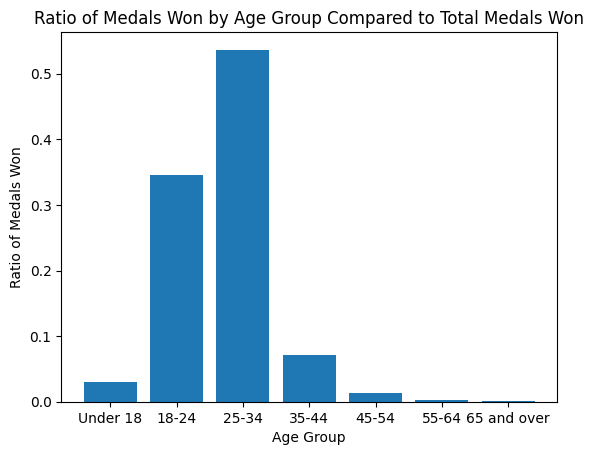

In [6]:
# 1.1 Medal Distribution by Age Group:
# Identifying the most successful age groups in terms of medal wins across all sports.

# Get the ratio of medals won by an age group compared to the total medals won by all age groups
medals_won = merged_data.dropna(axis=0, subset=['Medal'])
medals_won = medals_won['Age Group'].value_counts()
medals_won = medals_won.reindex(['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and over'])

total_medals_won = medals_won.sum()
medals_won_ratio = medals_won / total_medals_won

fig, ax = plt.subplots()
ax.set_title('Ratio of Medals Won by Age Group Compared to Total Medals Won')
ax.set_xlabel('Age Group')
ax.set_ylabel('Ratio of Medals Won')
ax.bar(medals_won_ratio.index, medals_won_ratio.values)

In [7]:
# 1.2 Average Age of Athletes vs Medalists by continent:
# Comparing the average age of all athletes and medal-winning athletes in each continent.

avg_age_athletes = merged_data.groupby('Continent')['Age'].mean()
avg_age_athletes = avg_age_athletes.reindex(continents_order)


# Show the average age of the athletes who win medals in each continent
avg_age_medalists = merged_data.dropna(axis=0, subset=['Medal']).groupby('Continent')['Age'].mean()
avg_age_medalists = avg_age_medalists.reindex(continents_order)

# 1.3 Age Profile of Top Performers (Gold Medalists) in Each continent:
# Examining the average age of top performers in different continents.
avg_age_gold_medalists = merged_data[merged_data['Medal'] == 'Gold'].groupby('Continent')['Age'].mean()
avg_age_gold_medalists = avg_age_gold_medalists.reindex(continents_order)

table = pd.DataFrame({'Average Age of Athletes': avg_age_athletes, 'Average Age of Medalists': avg_age_medalists, 'Average Age of Gold Medalists': avg_age_gold_medalists})
print(table)




           Average Age of Athletes  Average Age of Medalists  \
Continent                                                      
Europe                   26.022007                 26.517443   
Asia                     24.088378                 24.128485   
Africa                   24.652910                 24.036036   
America                  25.421703                 25.207376   
Oceania                  25.041624                 25.141866   

           Average Age of Gold Medalists  
Continent                                 
Europe                         26.698257  
Asia                           23.971606  
Africa                         24.132948  
America                        24.947940  
Oceania                        25.087420  


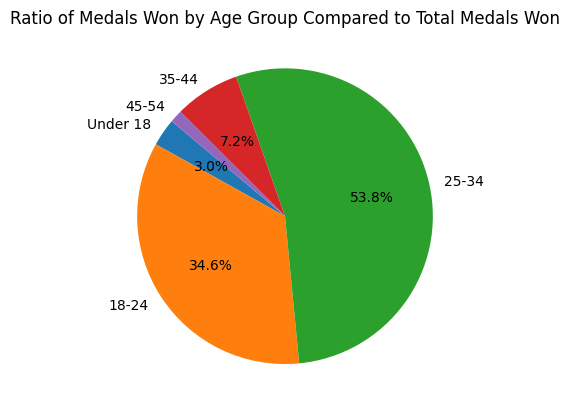

In [8]:
# 1.4 Dominant Age Groups in Various Sports:
# Determining which age groups are most successful in specific sports.
medals_won = merged_data.dropna(axis=0, subset=['Medal'])['Age Group'].value_counts().reindex(['Under 18', '18-24', '25-34', '35-44', '45-54'])
medals_won_ratio = medals_won / medals_won.sum()

def filter(pct):
    return ('%.1f%%' % pct) if pct >= 3 else ''

fig, ax = plt.subplots()
ax.set_title('Ratio of Medals Won by Age Group Compared to Total Medals Won')
ax.pie(medals_won_ratio, labels=medals_won_ratio.index, autopct=filter, startangle=140)

plt.show()



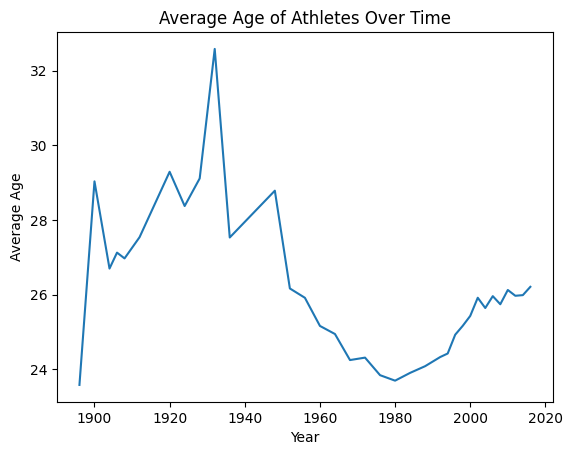

In [9]:
# 1.5 Evolution of Athlete Age Over Time:
# Analyzing how the average age of athletes has changed over time and exploring potential contributing factors.


average_age_of_athletes_over_time = merged_data.groupby('Year')['Age'].mean()
fig, ax = plt.subplots()
sns.lineplot(x=average_age_of_athletes_over_time.index, y=average_age_of_athletes_over_time.values, ax=ax)
ax.set_title('Average Age of Athletes Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Average Age')
plt.show()
